<a href="https://colab.research.google.com/github/Chonthichar/Air-Quality-Hoursly-Forecasting/blob/main/Air_Quality_Hoursly_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Course title: PGR-304 - Predictive Analytics**

**Candidate number: 2**


# **“Predictive Analytics of Air Quality Dataset in Urban Italy”**



---




### **Import packages for predictive analytics**





In [ ]:
pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.6 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import plotly.express as px
from statsmodels.tsa.stattools import acf, pacf
import plotly.graph_objects as go
import plotly.subplots as sp
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import VAR
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from pmdarima import auto_arima



---


# **Task 1 Undertanding the data (5%)**

---






## ▶ **a. Load and prepare the dataset**





In [ ]:
# Load the dataset
data = pd.read_excel('AirQualityUCI.xlsx')

# Convert data to DataFrame
df = pd.DataFrame(data)
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2005-04-04,14:00:00,2.2,1070.75,-200,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


## ▶ **b. Keep only necessary columns:**

In [ ]:
# Select required columns
columns = ['Date', 'Time', 'CO(GT)', 'NO2(GT)', 'RH']
df = df[columns]

# Ensure Date and Time are strings, then combine them into a single datetime column
df['datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))
df.set_index('datetime', inplace=True)

# Drop the original Date and Time columns
df.drop(['Date', 'Time'], axis=1, inplace=True)


<ipython-input-6-c9c306819324>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))
<ipython-input-6-c9c306819324>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Date', 'Time'], axis=1, inplace=True)


## ▶ **C. Display the size of the dataset:**

In [ ]:
df.shape
# df.tail()

(9357, 3)

##▶ **d. Exploratory data analysis (EDA)-Nature of the data and it correlations**

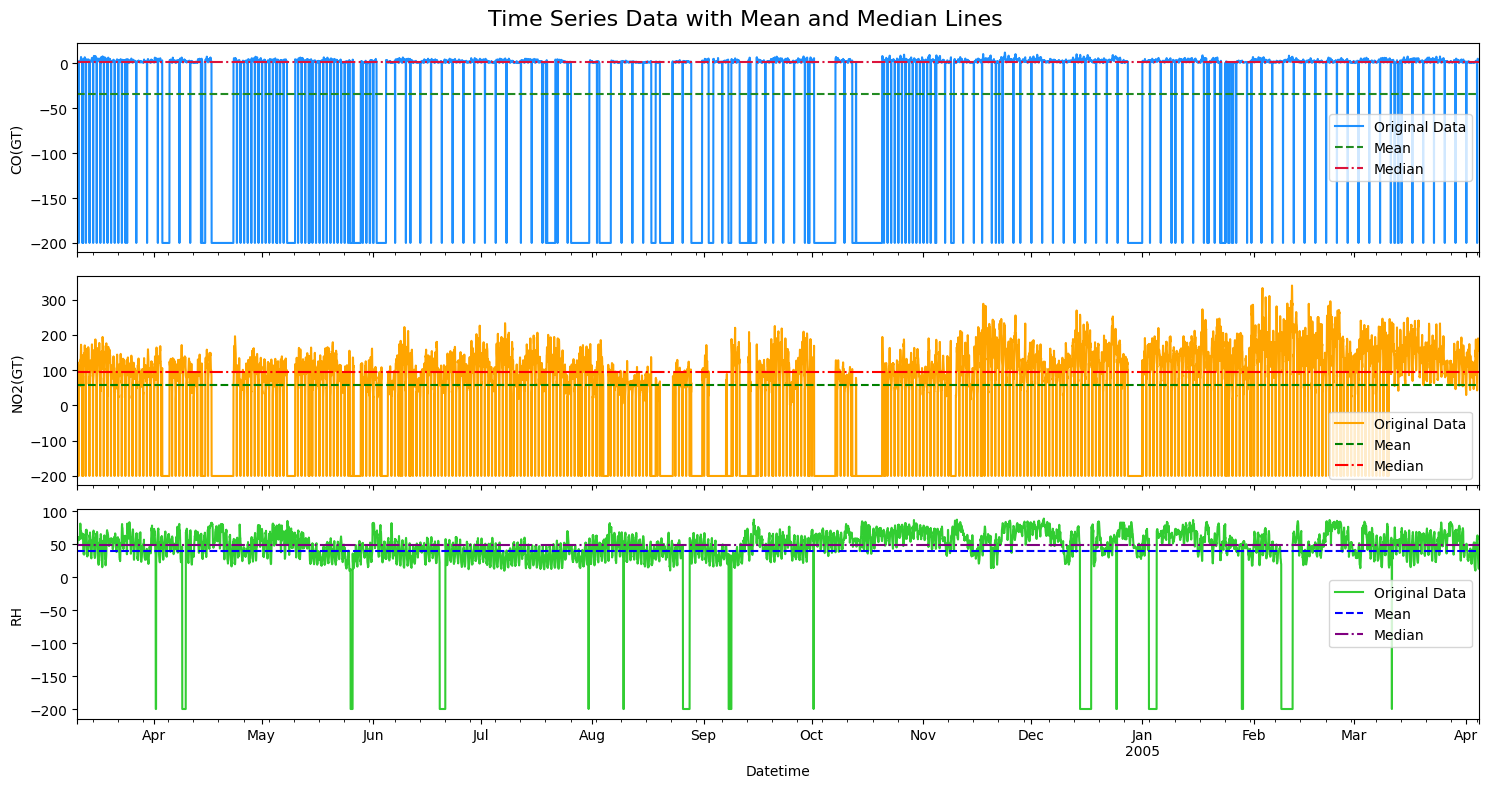

CO(GT):
  Mean: -34.2075
  Median: 1.5000

NO2(GT):
  Mean: 58.1359
  Median: 96.0000

RH:
  Mean: 39.4836
  Median: 48.5500



In [ ]:
colors = {
    'CO(GT)': {'data': 'dodgerblue', 'mean': 'forestgreen', 'median': 'crimson'},
    'NO2(GT)': {'data': 'orange', 'mean': 'green', 'median': 'red'},
    'RH': {'data': 'limegreen', 'mean': 'blue', 'median': 'purple'}
}

# Plot the original data with mean and median lines
fig, ax = plt.subplots(3, figsize=(15, 8), sharex=True)
plot_cols = ['CO(GT)', 'NO2(GT)', 'RH']

for i, col in enumerate(plot_cols):
    df[col].plot(ax=ax[i], label='Original Data', color=colors[col]['data'])
    ax[i].axhline(df[col].mean(), color=colors[col]['mean'], linestyle='--', label='Mean')
    ax[i].axhline(df[col].median(), color=colors[col]['median'], linestyle='-.', label='Median')
    ax[i].set_ylabel(col)
    ax[i].legend(loc='best')

ax[-1].set_xlabel('Datetime')
plt.suptitle("Time Series Data with Mean and Median Lines", fontsize=16)
plt.tight_layout()
plt.show()
means = df[plot_cols].mean()
medians = df[plot_cols].median()

for col in plot_cols:
    print(f"{col}:")
    print(f"  Mean: {means[col]:.4f}")
    print(f"  Median: {medians[col]:.4f}\n")


Index(['CO(GT)', 'NO2(GT)', 'RH'], dtype='object')


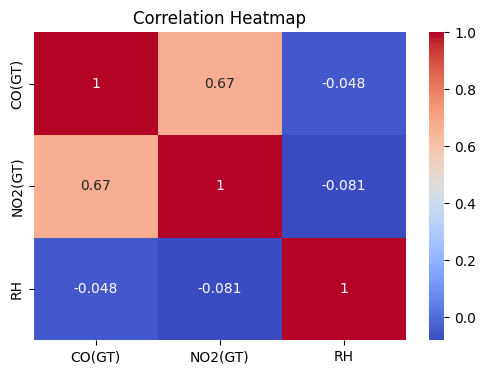

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
print(numeric_df.columns)

# Generate the correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

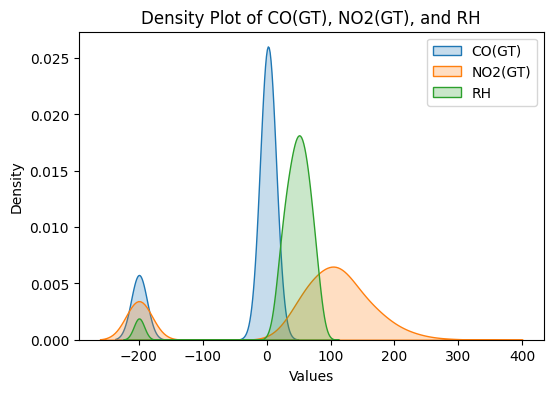

In [ ]:
df_density = df[['CO(GT)', 'NO2(GT)', 'RH']]
plt.figure(figsize=(6, 4))
for column in df_density.columns:
    sns.kdeplot(df_density[column], label=column, fill=True)

plt.title("Density Plot of CO(GT), NO2(GT), and RH")
plt.xlabel("Values")
plt.ylabel("Density")
plt.legend()
plt.show()




---


# **Task 2 - Utility value (5%)**


---



## **▶ 1. Data Preprocessing and cleaning action**


*   Check if the dataset is clean and properly formatted:
*   Justify the approach:





---


### **a) Data Type Verification**

---



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CO(GT)   9357 non-null   float64
 1   NO2(GT)  9357 non-null   float64
 2   RH       9357 non-null   float64
dtypes: float64(3)
memory usage: 292.4 KB


◾**Pollutant levels and RH reading: should be numerical (float):**

Since all pollutant levels and RH are already float 64, no additional changes are required for those.



---


### **2) Verify if the dataset is clean and properly formatted and decided cleaning action**

---



### **b) Handling missing values:**











◾**Missing indicators:** Check for missing and place holderlike (-200)

In [ ]:
missing_per_column = df.isnull().sum()
print("Missing values per column:")
print(missing_per_column)

Missing values per column:
CO(GT)     0
NO2(GT)    0
RH         0
dtype: int64


◾**Deicide how to handle missing (NaN) values -200:**


*   **We will replace -200 with NaN for better handling in the analysis**



In [ ]:
import numpy as np

# Replace -200 with NaN
df = df.replace(-200, np.nan)

print(df.isin([-200]).sum())
nan_per_column = df.isnull().sum()
print("Number of NaN values in each column:")
print(nan_per_column)

CO(GT)     0
NO2(GT)    0
RH         0
dtype: int64
Number of NaN values in each column:
CO(GT)     1683
NO2(GT)    1642
RH          366
dtype: int64


In [ ]:
# Calculate percentage of NaN values per column
nan_percentage = (df.isnull().sum() / len(df)) * 100
print("Percentage of NaN values in each column:")
print(nan_percentage)

Percentage of NaN values in each column:
CO(GT)     17.986534
NO2(GT)    17.548360
RH          3.911510
dtype: float64


In [ ]:
total_nan = df.isnull().sum().sum()
print(f"Total number of NaN values in the DataFrame: {total_nan}")

Total number of NaN values in the DataFrame: 3691


In [ ]:
print(df.isin([-200]).sum())

CO(GT)     0
NO2(GT)    0
RH         0
dtype: int64


### **◾ Interpolation to fill the misisng value:**







In [ ]:
df.interpolate(method='linear', limit_direction="forward",inplace=True, axis=0)

*   **After Interpolation**

In [ ]:
# Count NaN values before interpolation
nan_before = df.isnull().sum()

# Apply interpolation
df_interpolated = df.interpolate(method='linear', axis=0)
nan_after = df_interpolated.isnull().sum()

print("\nNumber of NaN values after interpolation:")
print(nan_after)


Number of NaN values after interpolation:
CO(GT)     0
NO2(GT)    0
RH         0
dtype: int64


### **c) Check for duplicate row:**







In [ ]:
print(df.duplicated().sum())

0


### **d) Post cleaning and verification: Histogram and density plot after interpretation**

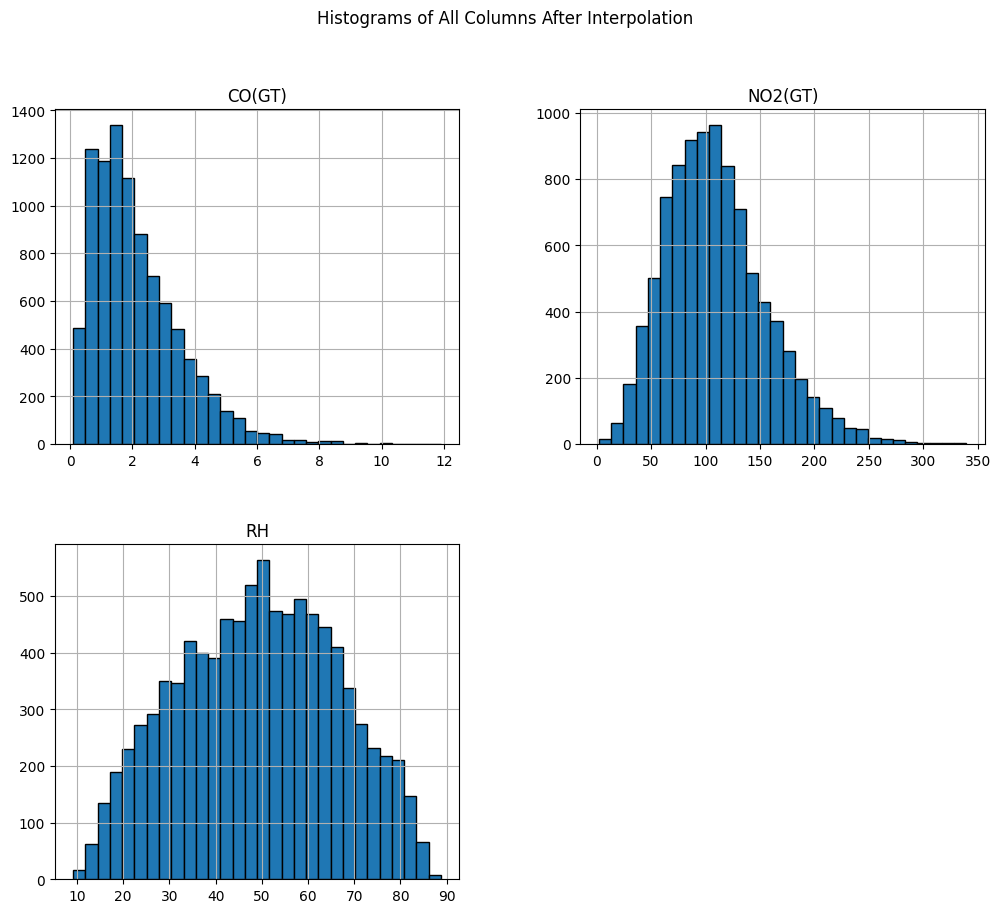

In [ ]:
import matplotlib.pyplot as plt
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Histograms of All Columns After Interpolation")
plt.show()

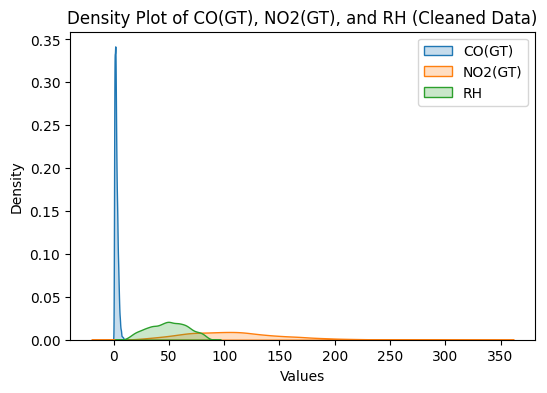

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df_density = df[['CO(GT)', 'NO2(GT)', 'RH']]
# Plot density for each column
plt.figure(figsize=(6, 4))
for column in df_density.columns:
    sns.kdeplot(df_density[column], label=column, fill=True)

plt.title("Density Plot of CO(GT), NO2(GT), and RH (Cleaned Data)")
plt.xlabel("Values")
plt.ylabel("Density")
plt.legend()
plt.show()

In [ ]:
df.columns

Index(['CO(GT)', 'NO2(GT)', 'RH'], dtype='object')

In [ ]:
df_original = df[['CO(GT)', 'NO2(GT)', 'RH']]
df_original

,CO(GT),NO2(GT),RH
datetime,,,
2004-03-10 18:00:00,2.6,113.0,48.875001
2004-03-10 19:00:00,2.0,92.0,47.700000
2004-03-10 20:00:00,2.2,114.0,53.975000
2004-03-10 21:00:00,2.2,122.0,60.000000
2004-03-10 22:00:00,1.6,116.0,59.575001
...,...,...,...
2005-04-04 10:00:00,3.1,189.8,29.250000
2005-04-04 11:00:00,2.4,179.2,23.725000
2005-04-04 12:00:00,2.4,174.7,18.350000




---


## **3) Check for Skewness and Outliers**

---



### **a) Apply Box-Cox Transformation:**


*   Box-Cox is preferred when the data contains positive values.
*   It will automatically determine the optimal transformation parameter to minimize skewness.



### **b) Verify the Results:**


*   Plot the transformed distributions to confirm the skewness has been reduced.



Box-Cox Lambda Values:
CO(GT): λ = 0.2868
NO2(GT): λ = 0.4727


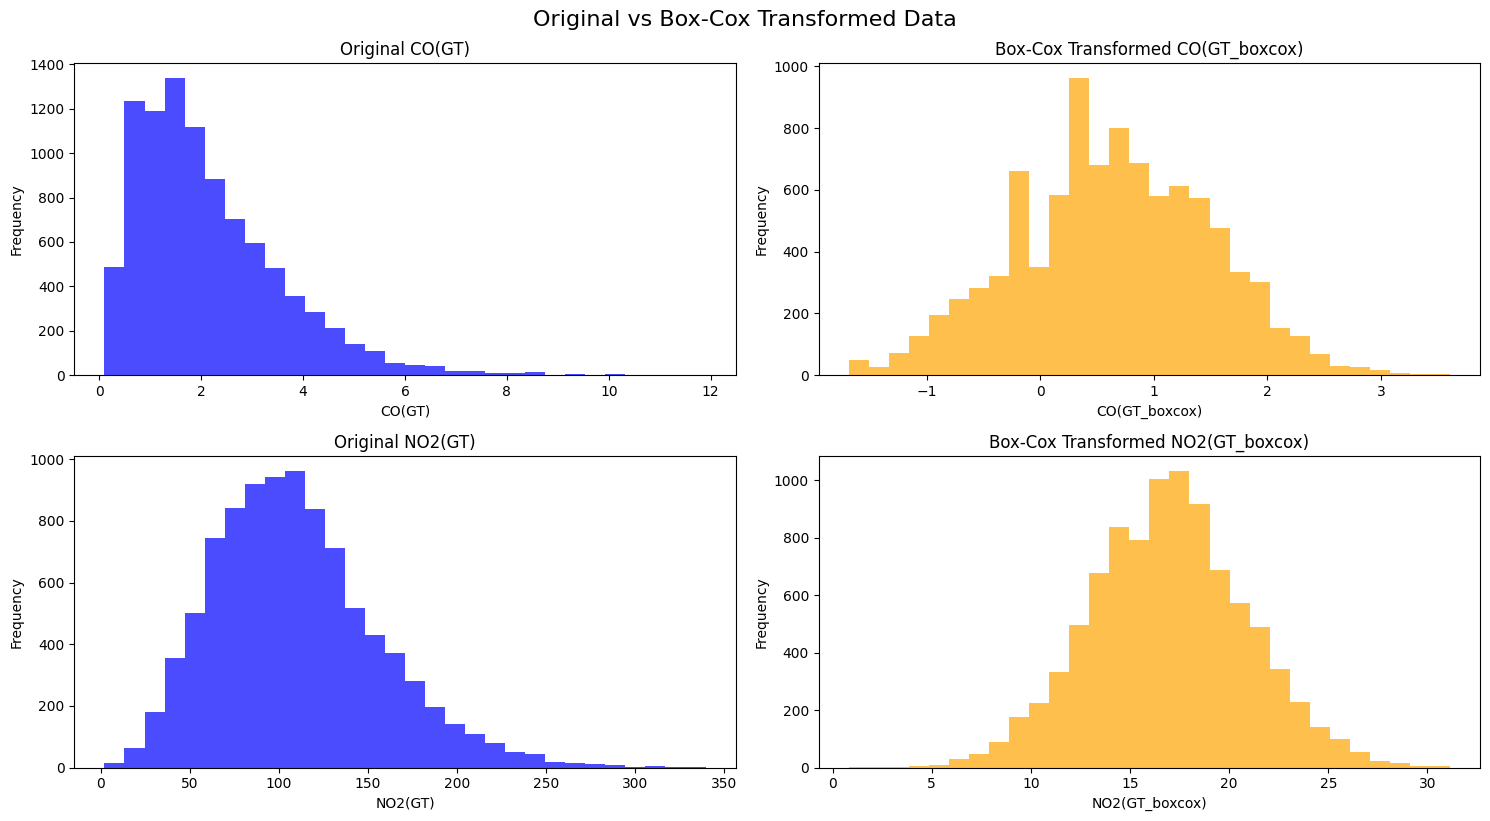

In [ ]:
transformed_data = {}
lambda_values = {}

# Columns to transform
columns_to_transform = ['CO(GT)', 'NO2(GT)']

for col in columns_to_transform:
    if (df[col] <= 0).any():
        df[col] = df[col] + 1

    # Apply Box-Cox transformation
    transformed_data[col], lambda_values[col] = boxcox(df[col])

    new_col_name = col.replace(')', '_boxcox)')
    df[new_col_name] = transformed_data[col]

print("Box-Cox Lambda Values:")
for col, lam in lambda_values.items():
    print(f"{col}: λ = {lam:.4f}")

fig, ax = plt.subplots(len(columns_to_transform), 2, figsize=(15, 8))

for i, col in enumerate(columns_to_transform):
    # Original data histogram
    ax[i, 0].hist(df[col], bins=30, color='blue', alpha=0.7)
    ax[i, 0].set_title(f"Original {col}")
    ax[i, 0].set_xlabel(col)
    ax[i, 0].set_ylabel("Frequency")

    # Box-Cox transformed data histogram
    transformed_col_name = col.replace(')', '_boxcox)')  # Adjusted name
    ax[i, 1].hist(df[transformed_col_name], bins=30, color='orange', alpha=0.7)
    ax[i, 1].set_title(f"Box-Cox Transformed {transformed_col_name}")
    ax[i, 1].set_xlabel(transformed_col_name)
    ax[i, 1].set_ylabel("Frequency")
plt.tight_layout()
plt.suptitle("Original vs Box-Cox Transformed Data", fontsize=16, y=1.02)
plt.show()

### **c) Check Skewness Before and After Box-Cox**

In [ ]:
columns_to_check = ['CO(GT)', 'NO2(GT)']
skewness_comparison = {}

for col in columns_to_check:
    # Skewness before Box-Cox
    original_skew = df[col].skew()
    # Skewness after Box-Cox
    transformed_col_name = col.replace(')', '_boxcox)')
    boxcox_skew = df[transformed_col_name].skew()
    skewness_comparison[col] = {
        'Original Skewness': original_skew,
        'Box-Cox Skewness': boxcox_skew
    }
print("Skewness Before and After Box-Cox Transformation:")
for col, skew_values in skewness_comparison.items():
    print(f"{col}:")
    print(f"  Original Skewness: {skew_values['Original Skewness']:.4f}")
    print(f"  Box-Cox Skewness: {skew_values['Box-Cox Skewness']:.4f}")
    print()

print(f"Skewness of RH: {df['RH'].skew():.4f}")

Skewness Before and After Box-Cox Transformation:
CO(GT):
  Original Skewness: 1.2923
  Box-Cox Skewness: -0.0176

NO2(GT):
  Original Skewness: 0.7072
  Box-Cox Skewness: 0.0076

Skewness of RH: -0.0439


### **d) Check for Distributions:**

In [ ]:
df.columns

Index(['CO(GT)', 'NO2(GT)', 'RH', 'CO(GT_boxcox)', 'NO2(GT_boxcox)'], dtype='object')

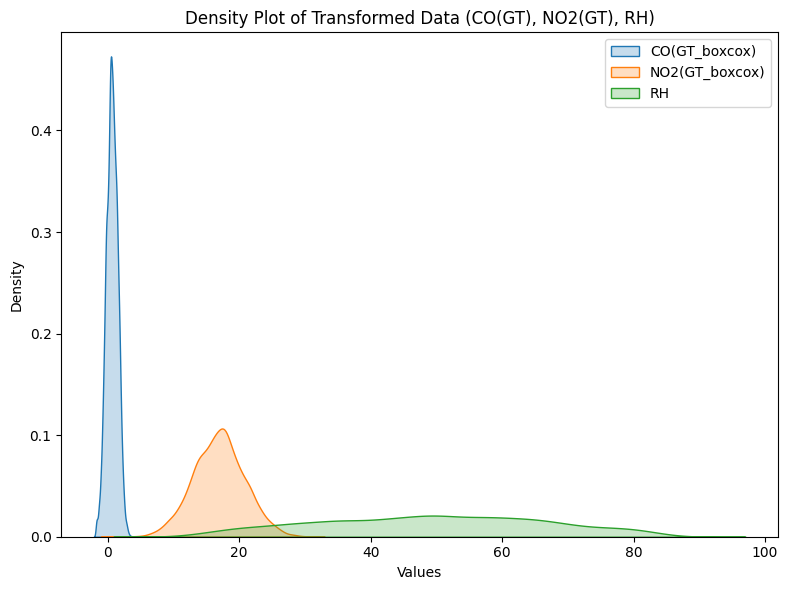

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['CO(GT_boxcox)', 'NO2(GT_boxcox)', 'RH']

plt.figure(figsize=(8, 6))
for col in columns_to_plot:
    sns.kdeplot(df[col], label=col, fill=True)

plt.title("Density Plot of Transformed Data (CO(GT), NO2(GT), RH)")
plt.xlabel("Values")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print(df.describe())

            CO(GT)      NO2(GT)           RH  CO(GT_boxcox)  NO2(GT_boxcox)
count  9357.000000  9357.000000  9357.000000    9357.000000     9357.000000
mean      2.130603   109.620033    49.189157       0.644301       16.917985
std       1.431736    46.451523    17.194081       0.838716        3.935813
min       0.100000     2.000000     9.175000      -1.685324        0.820177
25%       1.100000    76.000000    35.800000       0.096625       14.268650
50%       1.800000   104.827586    49.650000       0.640234       16.958263
75%       2.900000   136.400000    62.250002       1.245154       19.485782
max      11.900000   339.700000    88.725000       3.607141       31.133953


                CO(GT_boxcox)  NO2(GT_boxcox)        RH
CO(GT)               0.951700        0.672556  0.062649
NO2(GT)              0.686191        0.986591 -0.077893
RH                   0.026438       -0.085941  1.000000
CO(GT_boxcox)        1.000000        0.704921  0.026438
NO2(GT_boxcox)       0.704921        1.000000 -0.085941


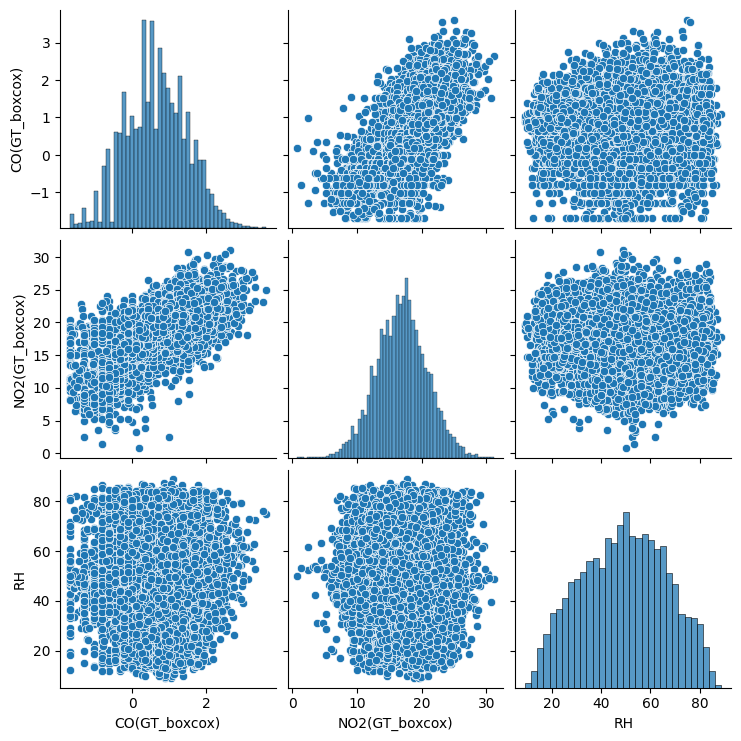

In [ ]:
# Calculate correlations between sensors and ground-truth pollutants
correlations = df.corr()
print(correlations[['CO(GT_boxcox)', 'NO2(GT_boxcox)', 'RH']])

import seaborn as sns
sns.pairplot(df[['CO(GT_boxcox)', 'NO2(GT_boxcox)', 'RH']])
plt.show()

# ▶ **b) Check  and address stationarity.**
*   Check stationarity, and perform required operations (if needed) until you are content
with the stationarity.







---


##  **Step 1 Before Box-Cox transfomation**

---

### **a) Check for stationary of series**

*   **Before Box-Cox**



Results of ADF Test for CO(GT):
Test Statistic: -9.872734502489461
p-value: 3.955249156437511e-17
Critical Values: {'1%': -3.431051910310215, '5%': -2.8618502001074853, '10%': -2.566935114435797}
CO(GT) is stationary (p-value < 0.05)

Results of ADF Test for NO2(GT):
Test Statistic: -7.916222981986746
p-value: 3.829862436398274e-12
Critical Values: {'1%': -3.431051157706947, '5%': -2.861849867543536, '10%': -2.566934937410664}
NO2(GT) is stationary (p-value < 0.05)

Results of ADF Test for RH:
Test Statistic: -7.234348638363154
p-value: 1.9571857721266288e-10
Critical Values: {'1%': -3.431051985659412, '5%': -2.8618502334031457, '10%': -2.5669351321592124}
RH is stationary (p-value < 0.05)



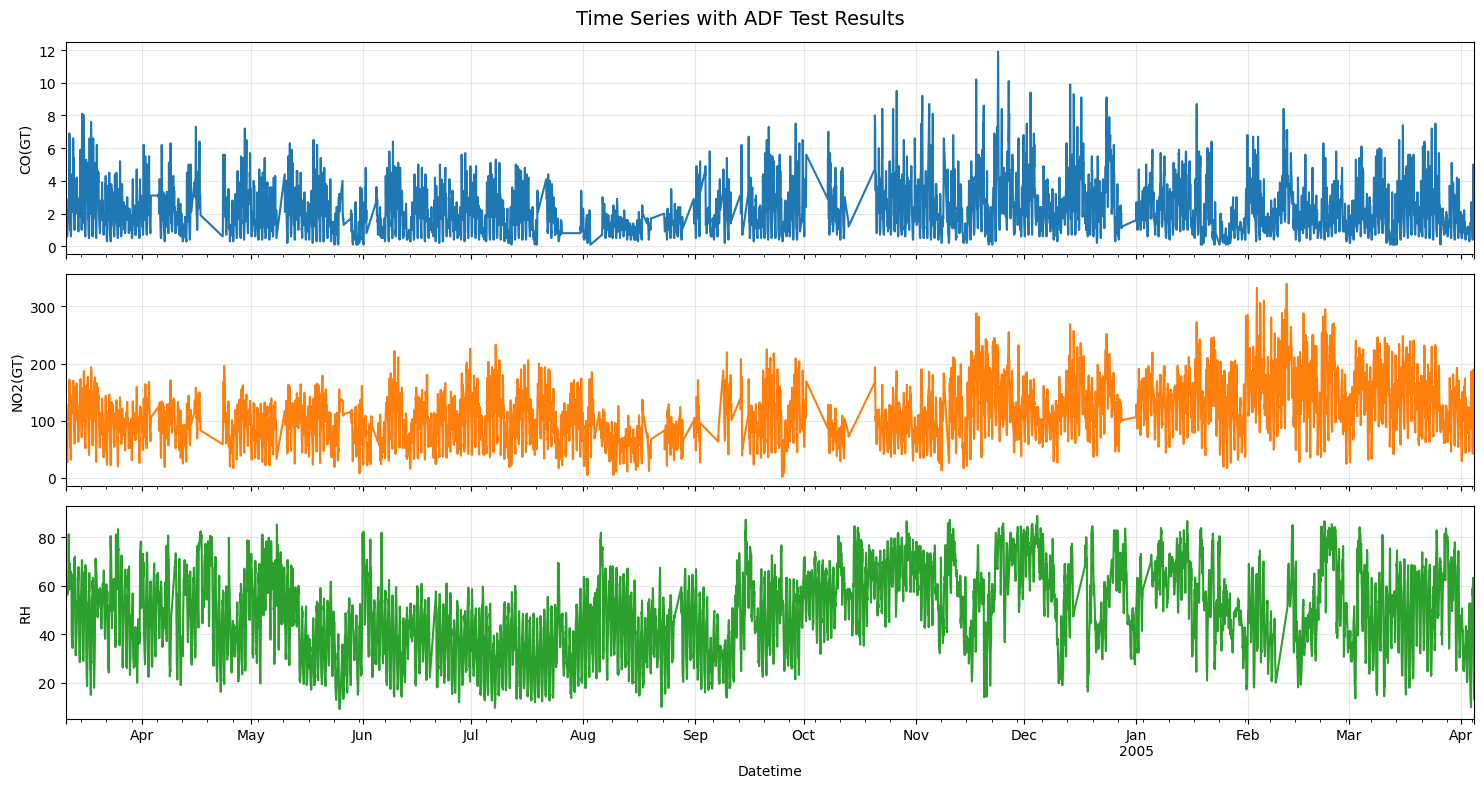

In [ ]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

def adf_test(series, column_name):
    result = adfuller(series.dropna())
    print(f"Results of ADF Test for {column_name}:")
    print(f"Test Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")
    if result[1] < 0.05:
        print(f"{column_name} is stationary (p-value < 0.05)\n")
    else:
        print(f"{column_name} is not stationary (p-value ≥ 0.05)\n")

for column in ['CO(GT)', 'NO2(GT)', 'RH']:
    adf_test(df[column], column)

fig, ax = plt.subplots(3, figsize=(15, 8), sharex=True)
plot_cols = ['CO(GT)', 'NO2(GT)', 'RH']
df[plot_cols].plot(subplots=True, legend=False, ax=ax)
for a in range(len(ax)):
    ax[a].set_ylabel(plot_cols[a])
    ax[a].set_xlabel("Datetime")
    ax[a].grid(alpha=0.3)
plt.suptitle('Time Series with ADF Test Results', fontsize=14)
plt.tight_layout()
plt.show()

### **Check for stationary of series**

*   **After Box-Cox**



Results of ADF Test for CO(GT_boxcox):
Test Statistic: -9.689508862809157
p-value: 1.146498760682321e-16
Critical Values: {'1%': -3.431051985659412, '5%': -2.8618502334031457, '10%': -2.5669351321592124}
CO(GT_boxcox) is stationary (p-value < 0.05)

Results of ADF Test for NO2(GT_boxcox):
Test Statistic: -8.299372384146015
p-value: 4.057379528054273e-13
Critical Values: {'1%': -3.431051157706947, '5%': -2.861849867543536, '10%': -2.566934937410664}
NO2(GT_boxcox) is stationary (p-value < 0.05)

Results of ADF Test for RH:
Test Statistic: -7.234348638363154
p-value: 1.9571857721266288e-10
Critical Values: {'1%': -3.431051985659412, '5%': -2.8618502334031457, '10%': -2.5669351321592124}
RH is stationary (p-value < 0.05)



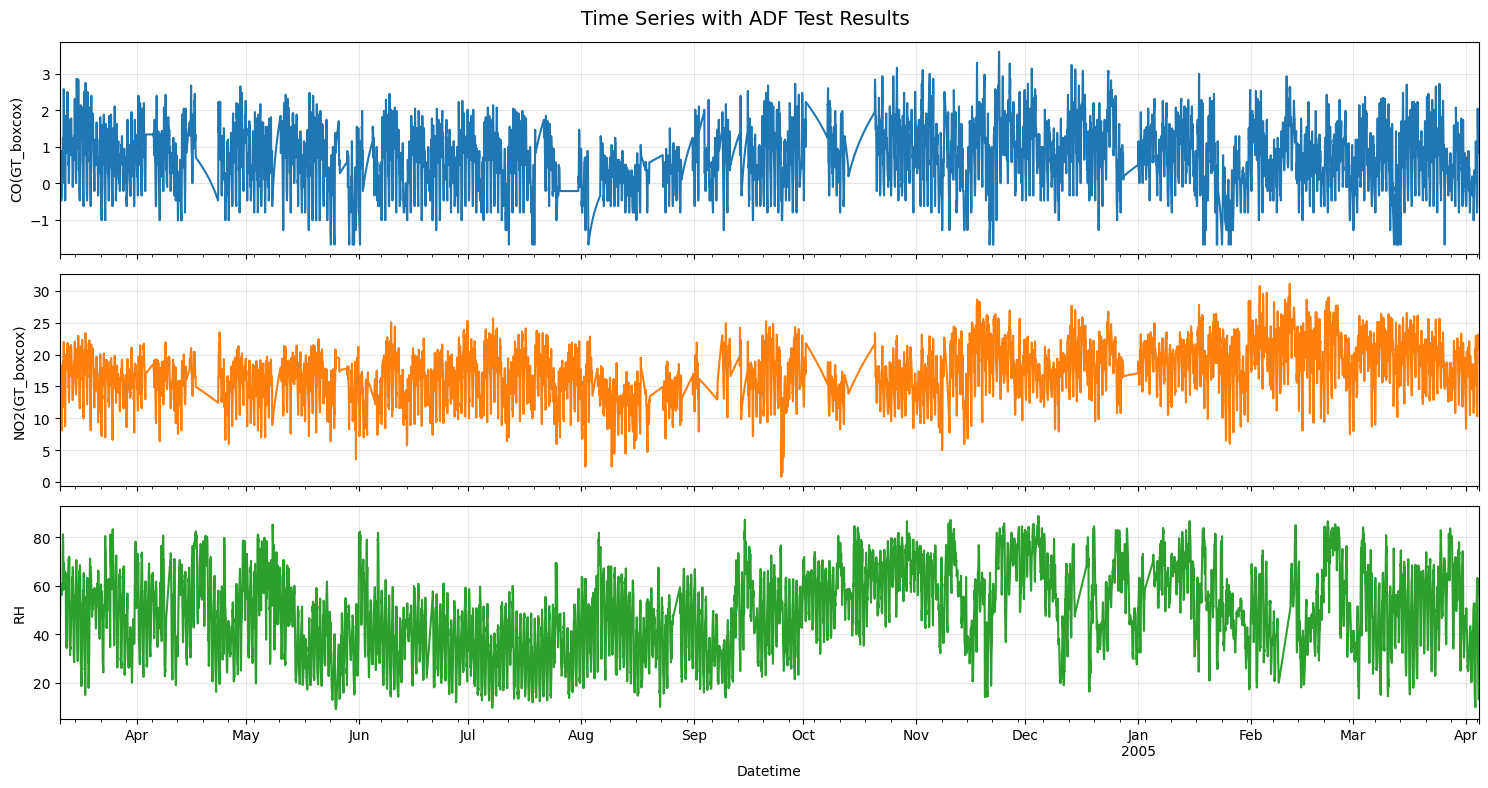

In [ ]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

def adf_test(series, column_name):
    result = adfuller(series.dropna())
    print(f"Results of ADF Test for {column_name}:")
    print(f"Test Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")
    if result[1] < 0.05:
        print(f"{column_name} is stationary (p-value < 0.05)\n")
    else:
        print(f"{column_name} is not stationary (p-value ≥ 0.05)\n")

for column in ['CO(GT_boxcox)', 'NO2(GT_boxcox)', 'RH']:
    adf_test(df[column], column)

fig, ax = plt.subplots(3, figsize=(15, 8), sharex=True)
plot_cols = ['CO(GT_boxcox)', 'NO2(GT_boxcox)', 'RH']
df[plot_cols].plot(subplots=True, legend=False, ax=ax)
for a in range(len(ax)):
    ax[a].set_ylabel(plot_cols[a])
    ax[a].set_xlabel("Datetime")
    ax[a].grid(alpha=0.3)
plt.suptitle('Time Series with ADF Test Results', fontsize=14)
plt.tight_layout()
plt.show()

### **Stationarity Comparison Before and After Box-Cox Transformation at Once**

Stationarity Comparison Before and After Box-Cox Transformation:
ADF Test for Original CO(GT):
  Test Statistic: -9.8727
  p-value: 0.0000
  Critical Values: {'1%': -3.431051910310215, '5%': -2.8618502001074853, '10%': -2.566935114435797}
  Original CO(GT) is stationary (p-value < 0.05)

ADF Test for Box-Cox Transformed CO(GT):
  Test Statistic: -9.6895
  p-value: 0.0000
  Critical Values: {'1%': -3.431051985659412, '5%': -2.8618502334031457, '10%': -2.5669351321592124}
  Box-Cox Transformed CO(GT) is stationary (p-value < 0.05)

ADF Test for Original NO2(GT):
  Test Statistic: -7.9162
  p-value: 0.0000
  Critical Values: {'1%': -3.431051157706947, '5%': -2.861849867543536, '10%': -2.566934937410664}
  Original NO2(GT) is stationary (p-value < 0.05)

ADF Test for Box-Cox Transformed NO2(GT):
  Test Statistic: -8.2994
  p-value: 0.0000
  Critical Values: {'1%': -3.431051157706947, '5%': -2.861849867543536, '10%': -2.566934937410664}
  Box-Cox Transformed NO2(GT) is stationary (p-value <

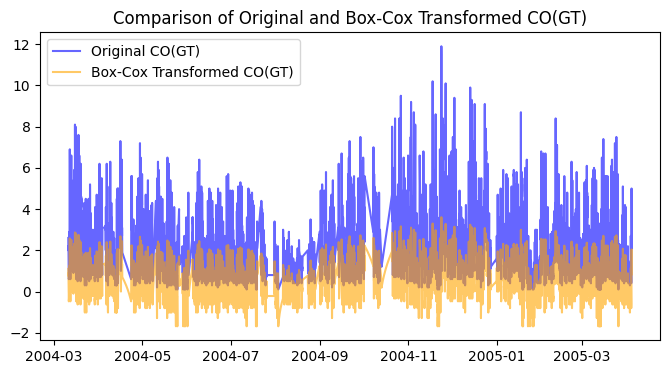

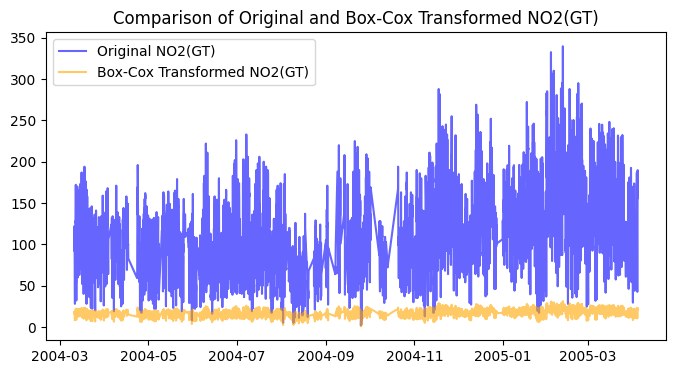

In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def adf_test(series, column_name):
    result = adfuller(series.dropna())
    test_stat = result[0]
    p_value = result[1]
    critical_values = result[4]

    print(f"ADF Test for {column_name}:")
    print(f"  Test Statistic: {test_stat:.4f}")
    print(f"  p-value: {p_value:.4f}")
    print(f"  Critical Values: {critical_values}")
    if p_value < 0.05:
        print(f"  {column_name} is stationary (p-value < 0.05)\n")
    else:
        print(f"  {column_name} is NOT stationary (p-value ≥ 0.05)\n")

columns_to_check = ['CO(GT)', 'NO2(GT)']

print("Stationarity Comparison Before and After Box-Cox Transformation:")
for col in columns_to_check:
    adf_test(df[col], f"Original {col}")
    transformed_col_name = col.replace(')', '_boxcox)')
    adf_test(df[transformed_col_name], f"Box-Cox Transformed {col}")

import matplotlib.pyplot as plt
for col in columns_to_check:
    transformed_col_name = col.replace(')', '_boxcox)')
    plt.figure(figsize=(8, 4))
    plt.plot(df[col], label=f"Original {col}", color='blue', alpha=0.6)
    plt.plot(df[transformed_col_name], label=f"Box-Cox Transformed {col}", color='orange', alpha=0.6)
    plt.title(f"Comparison of Original and Box-Cox Transformed {col}")
    plt.legend()
    plt.show()


### **b) Plot autocorrelation for time series**

Autocorrelation and Partial Autocorrelation for CO(GT_boxcox):


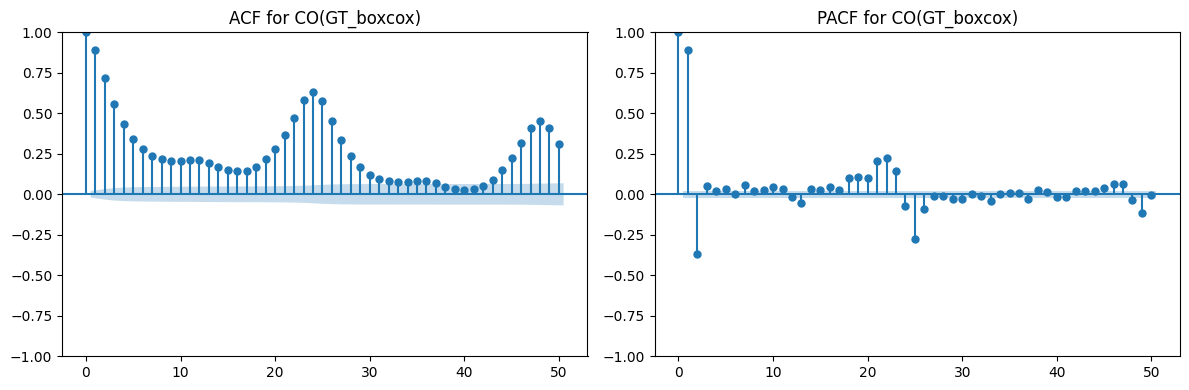

Autocorrelation and Partial Autocorrelation for NO2(GT_boxcox):


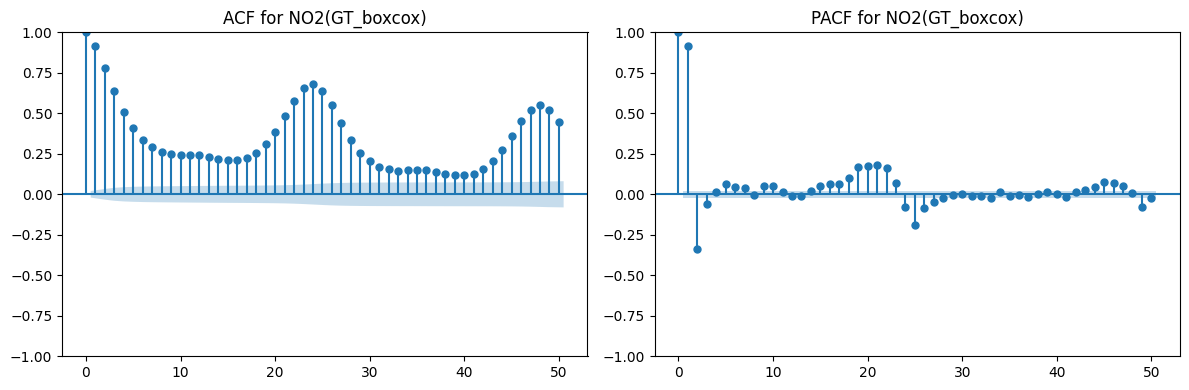

Autocorrelation and Partial Autocorrelation for RH:


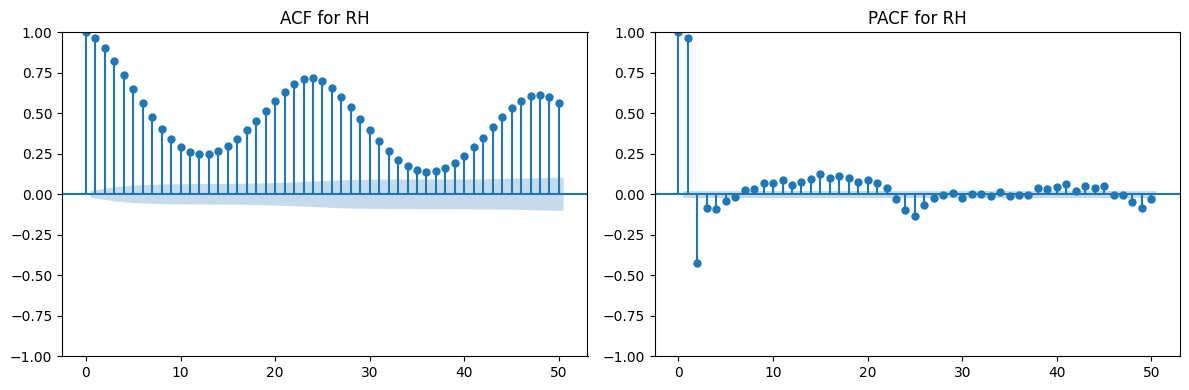

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Function to plot ACF and PACF
def plot_autocorrelation(series, column_name, lags=20):
    print(f"Autocorrelation and Partial Autocorrelation for {column_name}:")

    # Plot ACF
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plot_acf(series.dropna(), lags=lags, ax=plt.gca())
    plt.title(f'ACF for {column_name}')

    # Plot PACF
    plt.subplot(1, 2, 2)
    plot_pacf(series.dropna(), lags=lags, ax=plt.gca())
    plt.title(f'PACF for {column_name}')

    plt.tight_layout()
    plt.show()
for column in ['CO(GT_boxcox)', 'NO2(GT_boxcox)', 'RH']:
    lags = 20 if len(df[column].dropna()) < 100 else 50
    plot_autocorrelation(df[column], column, lags=lags)


## **▶ C) Investigating Univariate vs. VAR Models**



##  **Step 1 Granger Causality Tests**


*   Determines if one time series can predict another. If there is causality, a VAR model might be better.

  **find the best lag order:**

In [ ]:
from statsmodels.tsa.api import VAR

#  find the best lag order
model = VAR(df[['CO(GT_boxcox)', 'NO2(GT_boxcox)', 'RH']])
lag_selection = model.select_order(maxlags=10)
print(lag_selection.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        7.370       7.373       1588.       7.371
1        1.226       1.235       3.407       1.229
2       0.8140      0.8300       2.257      0.8194
3       0.7604      0.7833       2.139      0.7682
4       0.7264      0.7562       2.068      0.7365
5       0.7035      0.7402       2.021      0.7159
6       0.6862      0.7298       1.986      0.7010
7       0.6646      0.7150       1.944      0.6817
8       0.6456      0.7029       1.907      0.6650
9       0.6227      0.6869       1.864      0.6445
10     0.6029*     0.6740*      1.827*     0.6271*
--------------------------------------------------


**Granger Causality Tests:**

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

time_series_data = df[['CO(GT_boxcox)', 'NO2(GT_boxcox)', 'RH']]

# Perform Granger causality tests for each pair of variables
maxlag = 10
for col1 in time_series_data.columns:
    for col2 in time_series_data.columns:
        if col1 != col2:
            print(f"\nTesting Granger Causality: {col1} -> {col2}")
            grangercausalitytests(
                time_series_data[[col1, col2]], maxlag=maxlag, verbose=True
            )


Testing Granger Causality: CO(GT_boxcox) -> NO2(GT_boxcox)

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3644  , p=0.5461  , df_denom=9353, df_num=1
ssr based chi2 test:   chi2=0.3645  , p=0.5460  , df=1
likelihood ratio test: chi2=0.3645  , p=0.5460  , df=1
parameter F test:         F=0.3644  , p=0.5461  , df_denom=9353, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=49.2545 , p=0.0000  , df_denom=9350, df_num=2
ssr based chi2 test:   chi2=98.5617 , p=0.0000  , df=2
likelihood ratio test: chi2=98.0461 , p=0.0000  , df=2
parameter F test:         F=49.2545 , p=0.0000  , df_denom=9350, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=79.0358 , p=0.0000  , df_denom=9347, df_num=3
ssr based chi2 test:   chi2=237.2850, p=0.0000  , df=3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


likelihood ratio test: chi2=234.3254, p=0.0000  , df=3
parameter F test:         F=79.0358 , p=0.0000  , df_denom=9347, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=67.5440 , p=0.0000  , df_denom=9344, df_num=4
ssr based chi2 test:   chi2=270.4362, p=0.0000  , df=4
likelihood ratio test: chi2=266.6002, p=0.0000  , df=4
parameter F test:         F=67.5440 , p=0.0000  , df_denom=9344, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=59.6209 , p=0.0000  , df_denom=9341, df_num=5
ssr based chi2 test:   chi2=298.4558, p=0.0000  , df=5
likelihood ratio test: chi2=293.7924, p=0.0000  , df=5
parameter F test:         F=59.6209 , p=0.0000  , df_denom=9341, df_num=5

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=50.4884 , p=0.0000  , df_denom=9338, df_num=6
ssr based chi2 test:   chi2=303.3523, p=0.0000  , df=6
likelihood ratio test: chi2=298.5357, p=0.0000  , df=6
parameter F test:         F=50.48

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=10.5615 , p=0.0000  , df_denom=9347, df_num=3
ssr based chi2 test:   chi2=31.7082 , p=0.0000  , df=3
likelihood ratio test: chi2=31.6546 , p=0.0000  , df=3
parameter F test:         F=10.5615 , p=0.0000  , df_denom=9347, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=9.4411  , p=0.0000  , df_denom=9344, df_num=4
ssr based chi2 test:   chi2=37.8009 , p=0.0000  , df=4
likelihood ratio test: chi2=37.7247 , p=0.0000  , df=4
parameter F test:         F=9.4411  , p=0.0000  , df_denom=9344, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=11.6778 , p=0.0000  , df_denom=9341, df_num=5
ssr based chi2 test:   chi2=58.4579 , p=0.0000  , df=5
likelihood ratio test: chi2=58.2760 , p=0.0000  , df=5
parameter F test:         F=11.6778 , p=0.0000  , df_denom=9341, df_num=5

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=15.8417 , p=0.0000  , df_denom=9338, df_num=6
ssr based chi2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=35.0806 , p=0.0000  , df_denom=9338, df_num=6
ssr based chi2 test:   chi2=210.7764, p=0.0000  , df=6
likelihood ratio test: chi2=208.4360, p=0.0000  , df=6
parameter F test:         F=35.0806 , p=0.0000  , df_denom=9338, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=31.2249 , p=0.0000  , df_denom=9335, df_num=7
ssr based chi2 test:   chi2=218.9257, p=0.0000  , df=7
likelihood ratio test: chi2=216.4020, p=0.0000  , df=7
parameter F test:         F=31.2249 , p=0.0000  , df_denom=9335, df_num=7

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=28.0166 , p=0.0000  , df_denom=9332, df_num=8
ssr based chi2 test:   chi2=224.5411, p=0.0000  , df=8
likelihood ratio test: chi2=221.8871, p=0.0000  , df=8
parameter F test:         F=28.0166 , p=0.0000  , df_denom=9332, df_num=8

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=24.4228 , p=0.0000  , df_denom=9329, df_num=9
ssr based chi2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


parameter F test:         F=4.7086  , p=0.0009  , df_denom=9344, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=7.8000  , p=0.0000  , df_denom=9341, df_num=5
ssr based chi2 test:   chi2=39.0460 , p=0.0000  , df=5
likelihood ratio test: chi2=38.9648 , p=0.0000  , df=5
parameter F test:         F=7.8000  , p=0.0000  , df_denom=9341, df_num=5

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=16.9679 , p=0.0000  , df_denom=9338, df_num=6
ssr based chi2 test:   chi2=101.9491, p=0.0000  , df=6
likelihood ratio test: chi2=101.3973, p=0.0000  , df=6
parameter F test:         F=16.9679 , p=0.0000  , df_denom=9338, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=27.1369 , p=0.0000  , df_denom=9335, df_num=7
ssr based chi2 test:   chi2=190.2638, p=0.0000  , df=7
likelihood ratio test: chi2=188.3539, p=0.0000  , df=7
parameter F test:         F=27.1369 , p=0.0000  , df_denom=9335, df_num=7

Granger Causa

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=100.4851, p=0.0000  , df_denom=9347, df_num=3
ssr based chi2 test:   chi2=301.6812, p=0.0000  , df=3
likelihood ratio test: chi2=296.9185, p=0.0000  , df=3
parameter F test:         F=100.4851, p=0.0000  , df_denom=9347, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=109.7108, p=0.0000  , df_denom=9344, df_num=4
ssr based chi2 test:   chi2=439.2660, p=0.0000  , df=4
likelihood ratio test: chi2=429.2629, p=0.0000  , df=4
parameter F test:         F=109.7108, p=0.0000  , df_denom=9344, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=100.7763, p=0.0000  , df_denom=9341, df_num=5
ssr based chi2 test:   chi2=504.4751, p=0.0000  , df=5
likelihood ratio test: chi2=491.3390, p=0.0000  , df=5
parameter F test:         F=100.7763, p=0.0000  , df_denom=9341, df_num=5

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=91.9080 , p=0.0000  , df_denom=9338, df_num=6
ssr based chi2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



ssr based chi2 test:   chi2=472.8985, p=0.0000  , df=5
likelihood ratio test: chi2=461.3304, p=0.0000  , df=5
parameter F test:         F=94.4685 , p=0.0000  , df_denom=9341, df_num=5

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=89.7121 , p=0.0000  , df_denom=9338, df_num=6
ssr based chi2 test:   chi2=539.0219, p=0.0000  , df=6
likelihood ratio test: chi2=524.0588, p=0.0000  , df=6
parameter F test:         F=89.7121 , p=0.0000  , df_denom=9338, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=79.1740 , p=0.0000  , df_denom=9335, df_num=7
ssr based chi2 test:   chi2=555.1082, p=0.0000  , df=7
likelihood ratio test: chi2=539.2543, p=0.0000  , df=7
parameter F test:         F=79.1740 , p=0.0000  , df_denom=9335, df_num=7

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=70.9671 , p=0.0000  , df_denom=9332, df_num=8
ssr based chi2 test:   chi2=568.7708, p=0.0000  , df=8
likelihood ratio test: chi2=552.

## **Justification choice**


The dataset is suitable for modeling with a VAR model.

*   There is significant Granger causality between the variables at multiple lags.This suggests that the time series should not be treated as independent univariate series.

*   **Recommendation**: Use a Vector Autoregressive (VAR) model to capture the relationships between CO(GT), NO2(GT), and RH.







# **Task 3 – Analysis, modeling and prediction (60%)**

## **1. Split Data into Train and Test Sets**


*   Use the **train set** for fitting the VAR model and selecting the lag order.
*   Use the **test set** for validating the predictions.



In [ ]:
print(df.columns)  # Displays all column names

Index(['CO(GT)', 'NO2(GT)', 'RH', 'CO(GT_boxcox)', 'NO2(GT_boxcox)'], dtype='object')


In [ ]:
df = df[['CO(GT_boxcox)', 'NO2(GT_boxcox)', 'RH']]
nobs = 24

# Split the data into train and test sets
train = df[:-nobs]
test = df[-nobs:]
print("Train Set Shape:", train.shape)
print("Test Set Shape:", test.shape)
print("Columns in Train/Test Sets:", train.columns)

Train Set Shape: (9333, 3)
Test Set Shape: (24, 3)
Columns in Train/Test Sets: Index(['CO(GT_boxcox)', 'NO2(GT_boxcox)', 'RH'], dtype='object')


## **2. Fit a VAR Model and Select Lag Order (p)**


*   Use the training set to fit the VAR model.
*   Select the optimal lag order (p) using information criteria such as AIC, BIC, or HQIC using Train dataset.



In [ ]:
# Check data types in the train dataset
print(train.dtypes)

CO(GT_boxcox)     float64
NO2(GT_boxcox)    float64
RH                float64
dtype: object


In [ ]:
model = VAR(train)
x = model.select_order(maxlags=15)
x.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,7.369,7.372,1587.,7.370
1,1.221,1.231,3.392,1.225
2,0.8123,0.8284,2.253,0.8177
3,0.7591,0.7821,2.136,0.7669
4,0.7250,0.7549,2.065,0.7352
5,0.7020,0.7388,2.018,0.7145
6,0.6849,0.7286,1.984,0.6998
7,0.6637,0.7143,1.942,0.6809
8,0.6449,0.7024,1.906,0.6644
9,0.6222,0.6865,1.863,0.6440


## **3. VAR model Fitting:**

*   **Use Lag 15 when fitting your VAR model.**
*   **Use the Train set for fitting the VAR model**
*   **Evaluated residuals using:**





In [ ]:
results = model.fit(15);
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 09, Dec, 2024
Time:                     16:30:17
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   0.636929
Nobs:                     9318.00    HQIC:                  0.567107
Log likelihood:          -42001.8    FPE:                    1.70095
AIC:                     0.531189    Det(Omega_mle):         1.67601
--------------------------------------------------------------------
Results for equation CO(GT_boxcox)
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.052969         0.026621            1.990           0.047
L1.CO(GT_boxcox)           1.077830         0.014443           74.625           0.000
L1.NO2(GT_boxcox)          0.029

### **Evaluated residuals diagnosis using:**

---



In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Check for autocorrelation in residuals
residuals = results.resid
for col in residuals.columns:
    print(f"\nLjung-Box Test for residuals of {col}:")
    print(acorr_ljungbox(residuals[col], lags=[10], return_df=True))


Ljung-Box Test for residuals of CO(GT_boxcox):
     lb_stat  lb_pvalue
10  6.686954   0.754631

Ljung-Box Test for residuals of NO2(GT_boxcox):
     lb_stat  lb_pvalue
10  7.237319   0.702867

Ljung-Box Test for residuals of RH:
      lb_stat  lb_pvalue
10  18.072177   0.053758


In [ ]:
from statsmodels.stats.stattools import durbin_watson

# Calculate the Durbin-Watson statistic for the residuals
out = durbin_watson(results.resid)
for col, val in zip(train.columns, out):
    print(col, ':', round(val, 2))

CO(GT_boxcox) : 2.0
NO2(GT_boxcox) : 2.01
RH : 2.01


## **4. Forecasting and Evaluate with Test Data:**

*   Generate forecasts for the next 24 steps (length of the test set).
*   Convert the forecast into the datafram to compare with the test set
*   Visualize the actual vs.forecasted values.
*   Evaluate the forecast accuracy using metrics like MAEand RMSE



**Forecasting:**

In [ ]:
forecast_input = train.values[-results.k_ar:]
fc = results.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=test.index, columns=[col + '_forecast' for col in train.columns])

print("Columns in Test DataFrame:")
print(test.columns)

print("\nColumns in Forecast DataFrame:")
print(df_forecast.columns)



Columns in Test DataFrame:
Index(['CO(GT_boxcox)', 'NO2(GT_boxcox)', 'RH'], dtype='object')

Columns in Forecast DataFrame:
Index(['CO(GT_boxcox)_forecast', 'NO2(GT_boxcox)_forecast', 'RH_forecast'], dtype='object')


##  **a) Compare Actual and forecasting with the last 24 points (24 hours)**


*   **Actual data for comparison:** Preprocessed original data without missing values or -200 placeholders
*   **Forecasted data for comparison**: Inverse-transformed data from the model, matching the original data's scale.



Comparison of Actual and Forecasted Values:
                     CO(GT)  NO2(GT)         RH  CO(GT)_forecast  \
datetime                                                           
2005-04-03 15:00:00    1.10    100.4  11.075000         1.159746   
2005-04-03 16:00:00    1.30    132.0  10.375000         1.383062   
2005-04-03 17:00:00    1.40    156.3   9.875000         1.645477   
2005-04-03 18:00:00    1.20    137.9  21.699999         1.793479   
2005-04-03 19:00:00    2.70    181.3  33.050000         1.825683   
2005-04-03 20:00:00    2.50    186.8  40.724999         1.672275   
2005-04-03 21:00:00    1.50    157.8  46.550000         1.405112   
2005-04-03 22:00:00    1.60    153.2  48.975000         1.161356   
2005-04-03 23:00:00    1.20    127.6  52.500000         0.953460   
2005-04-04 00:00:00    0.90     93.0  51.450000         0.847060   
2005-04-04 01:00:00    0.60     58.3  51.150001         0.776991   
2005-04-04 02:00:00    0.50     54.6  56.300000         0.731903   
2005

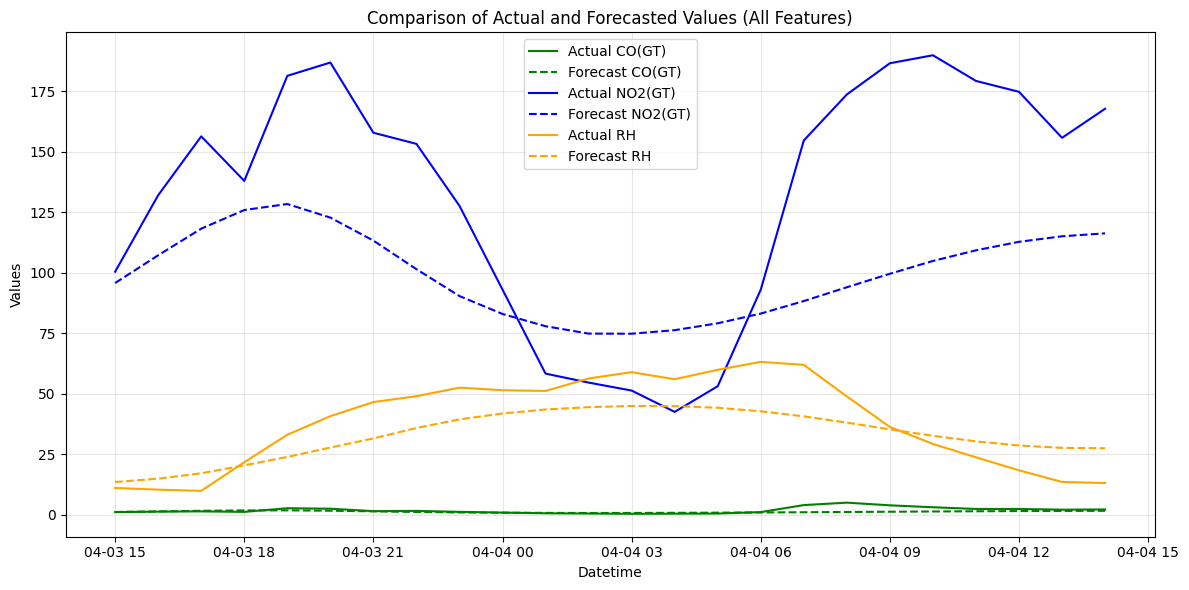

In [ ]:
from scipy.special import inv_boxcox
import matplotlib.pyplot as plt

# Inverse Box-Cox transformation for forecasted values
lambda_co = lambda_values['CO(GT)']
lambda_no2 = lambda_values['NO2(GT)']
df_forecast['CO(GT)_forecast'] = inv_boxcox(df_forecast['CO(GT_boxcox)_forecast'], lambda_co)
df_forecast['NO2(GT)_forecast'] = inv_boxcox(df_forecast['NO2(GT_boxcox)_forecast'], lambda_no2)
df_forecast['RH_forecast'] = df_forecast['RH_forecast']
features = ['CO(GT)', 'NO2(GT)', 'RH']
forecast_features = [f"{col}_forecast" for col in features]
df_comparison = pd.concat([df_original.loc[test.index], df_forecast[forecast_features]], axis=1)
print("Comparison of Actual and Forecasted Values:")
print(df_comparison)
plt.figure(figsize=(12, 6))

colors = {
    'CO(GT)': 'green',
    'NO2(GT)': 'blue',
    'RH': 'orange'
}

for feature, color in colors.items():
    plt.plot(
        df_original.loc[test.index].index,
        df_original.loc[test.index][feature],
        label=f"Actual {feature}",
        color=color,
        linestyle='-'
    )
    plt.plot(
        df_forecast.index,
        df_forecast[f"{feature}_forecast"],
        label=f"Forecast {feature}",
        color=color,
        linestyle='--'
    )
plt.title("Comparison of Actual and Forecasted Values (All Features)")
plt.xlabel("Datetime")
plt.ylabel("Values")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## **b) Forecasting the next 2 days (48 hours) (beyond the test set)**

<ipython-input-61-fa0d47fa602f>:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.asfreq('H')
<ipython-input-61-fa0d47fa602f>:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(hours=1), periods=forecast_steps, freq='H')


New Datetime frequency: <Hour>


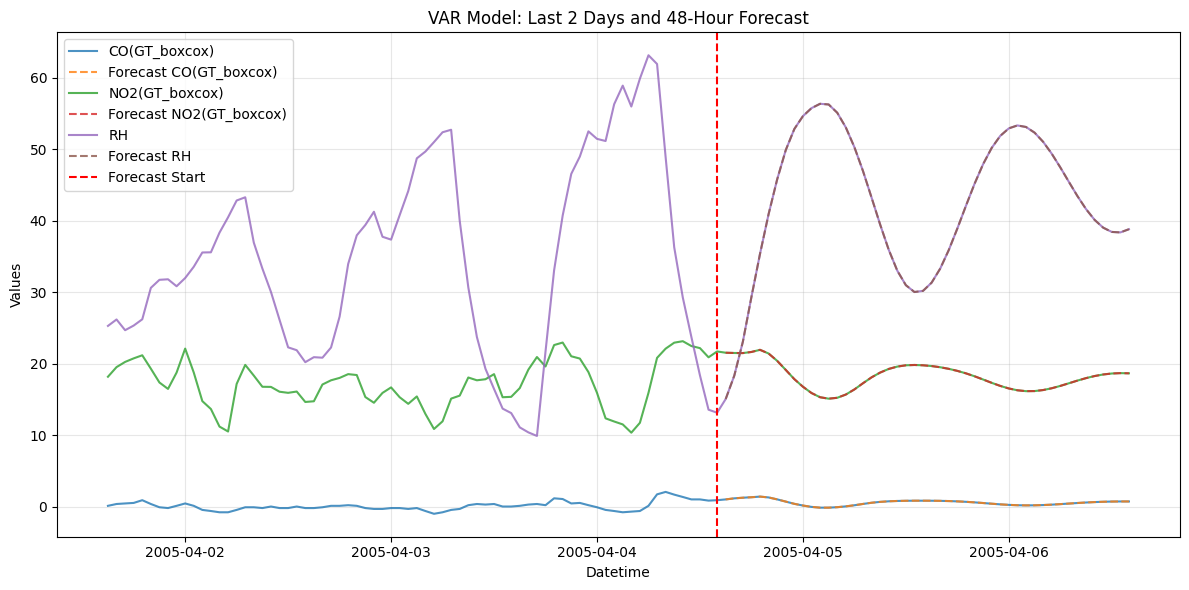

Datetime Range in Combined Dataset:
Start: 2005-04-01 15:00:00
End: 2005-04-06 14:00:00
Total Duration: 4 days 23:00:00


In [ ]:
from statsmodels.tsa.api import VAR
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import inv_boxcox

df = df.asfreq('H')
print(f"New Datetime frequency: {df.index.freq}")

days_to_include = 3
hours_to_include = days_to_include * 24
df_last_15_days = df.iloc[-hours_to_include:]
model = VAR(df)
results = model.fit(maxlags=15)

forecast_steps = 48
forecast_input = df.values[-results.k_ar:]
forecast = results.forecast(y=forecast_input, steps=forecast_steps)
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(hours=1), periods=forecast_steps, freq='H')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=df.columns)

lambda_co = lambda_values.get('CO(GT)', None)
lambda_no2 = lambda_values.get('NO2(GT)', None)

if lambda_co and lambda_no2:
    forecast_df['CO(GT)'] = inv_boxcox(forecast_df['CO(GT_boxcox)'], lambda_co)
    forecast_df['NO2(GT)'] = inv_boxcox(forecast_df['NO2(GT_boxcox)'], lambda_no2)
    forecast_df['RH'] = forecast_df['RH']
else:
    print("Box-Cox lambda values not found; skipping inverse transformation.")

combined_df = pd.concat([df_last_15_days, forecast_df])

plt.figure(figsize=(12, 6))
for column in df.columns:
    plt.plot(combined_df.index, combined_df[column], label=f"{column}", alpha=0.8)
    plt.plot(forecast_df.index, forecast_df[column], linestyle='--', label=f"Forecast {column}", alpha=0.8)

plt.title("VAR Model: Last 2 Days and 48-Hour Forecast")
plt.xlabel("Datetime")
plt.axvline(x=df.index[-1], color='red', linestyle='--', label='Forecast Start')  # Line at the start of the forecast
plt.ylabel("Values")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
print("Datetime Range in Combined Dataset:")
print(f"Start: {combined_df.index.min()}")
print(f"End: {combined_df.index.max()}")
print(f"Total Duration: {combined_df.index.max() - combined_df.index.min()}")

### **C) Evaluated the model’s performance using metric such as MAE,  RMSE,  MAPE, ME, MPE**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

metrics = {}
for col in test.columns:
    actual = test[col]
    forecast = df_forecast[col + '_forecast']
    mae = mean_absolute_error(actual, forecast)
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100
    me = np.mean(actual - forecast)
    mpe = np.mean((actual - forecast) / actual) * 100
    correlation = np.corrcoef(actual, forecast)[0, 1]
    minmax_error = np.mean(np.abs(actual - forecast) / (np.max(actual) - np.min(actual)))

    metrics[col] = {
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape,
        'ME': me,
        'MPE': mpe,
        'Correlation': correlation,
        'MinMax Error': minmax_error
    }

print("\nForecast Evaluation Metrics:")
for col, metric_values in metrics.items():
    print(f"\n{col}:")
    for metric, value in metric_values.items():
        print(f"  {metric}: {value:.4f}")

metrics_df = pd.DataFrame(metrics).T
print("\nMetrics DataFrame:")
print(metrics_df)



Forecast Evaluation Metrics:

CO(GT_boxcox):
  MAE: 0.5232
  RMSE: 0.7148
  MAPE: 72.9385
  ME: 0.2871
  MPE: 37.1960
  Correlation: 0.5997
  MinMax Error: 0.1835

NO2(GT_boxcox):
  MAE: 3.3858
  RMSE: 3.7800
  MAPE: 18.2030
  ME: 2.2314
  MPE: 8.0360
  Correlation: 0.8273
  MinMax Error: 0.2644

RH:
  MAE: 10.4572
  RMSE: 11.7460
  MAPE: 33.8947
  ME: 5.2152
  MPE: -3.4335
  Correlation: 0.8998
  MinMax Error: 0.1963

Metrics DataFrame:
                      MAE       RMSE       MAPE        ME        MPE  \
CO(GT_boxcox)    0.523215   0.714784  72.938452  0.287143  37.195976   
NO2(GT_boxcox)   3.385772   3.780016  18.202962  2.231367   8.035981   
RH              10.457218  11.746007  33.894668  5.215172  -3.433489   

                Correlation  MinMax Error  
CO(GT_boxcox)      0.599695      0.183516  
NO2(GT_boxcox)     0.827347      0.264437  
RH                 0.899794      0.196288  


# **🌱 Bonus Task -  Analysis, modeling and prediction  (20%)**

##  **ARIMA Modeling:**

---



### **1. Fit seperate ARIMA Model**

In [ ]:
df_Arima = df[['CO(GT_boxcox)', 'NO2(GT_boxcox)', 'RH']]

nobs = 24
train = df_Arima[:-nobs]
test = df_Arima[-nobs:]

# Print the shapes to verify
print("Train Set Shape:", train.shape)
print("Test Set Shape:", test.shape)
print("Columns in Train/Test Sets:", train.columns)


Train Set Shape: (9333, 3)
Test Set Shape: (24, 3)
Columns in Train/Test Sets: Index(['CO(GT_boxcox)', 'NO2(GT_boxcox)', 'RH'], dtype='object')


### **Code to Define (p, d, q) Using auto_arima**

In [ ]:
from pmdarima import auto_arima
best_orders = {}
for column in train.columns:
    print(f"Finding best order for {column}...")
    stepwise_model = auto_arima(train[column],
                                seasonal=False,
                                trace=True,
                                suppress_warnings=True,
                                max_p=5,
                                max_q=5,
                                max_d=2,
                                error_action="ignore")
    best_orders[column] = stepwise_model.order
    print(f"Best order for {column}: {stepwise_model.order}\n")

# Display the best (p, d, q) orders
print("Best (p, d, q) orders for each series:")
for col, order in best_orders.items():
    print(f"{col}: {order}")


Finding best order for CO(GT_boxcox)...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6944.716, Time=34.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8928.325, Time=2.56 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8099.189, Time=2.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7966.546, Time=4.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8926.326, Time=0.84 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=48.89 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6934.323, Time=51.28 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7968.193, Time=5.60 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7886.186, Time=3.52 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6934.638, Time=24.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=7786.665, Time=1.74 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6934.246, Time=21.30 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=6936.755, Time=27.25 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=6934.856, Time=1

In [ ]:
df_original.columns

Index(['CO(GT)', 'NO2(GT)', 'RH'], dtype='object')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Comparison of Actual and Forecasted Values:
                     CO(GT)  NO2(GT)         RH  CO(GT)_forecast  \
datetime                                                           
2005-04-03 15:00:00    1.10    100.4  11.075000         1.052411   
2005-04-03 16:00:00    1.30    132.0  10.375000         1.071795   
2005-04-03 17:00:00    1.40    156.3   9.875000         1.077434   
2005-04-03 18:00:00    1.20    137.9  21.699999         1.088735   
2005-04-03 19:00:00    2.70    181.3  33.050000         1.131710   
2005-04-03 20:00:00    2.50    186.8  40.724999         1.148589   
2005-04-03 21:00:00    1.50    157.8  46.550000         1.137202   
2005-04-03 22:00:00    1.60    153.2  48.975000         1.139112   
2005-04-03 23:00:00    1.20    127.6  52.500000         1.162039   
2005-04-04 00:00:00    0.90     93.0  51.450000         1.165297   
2005-04-04 01:00:00    0.60     58.3  51.150001         1.148236   
2005-04-04 02:00:00    0.50     54.6  56.300000         1.147338   
2005

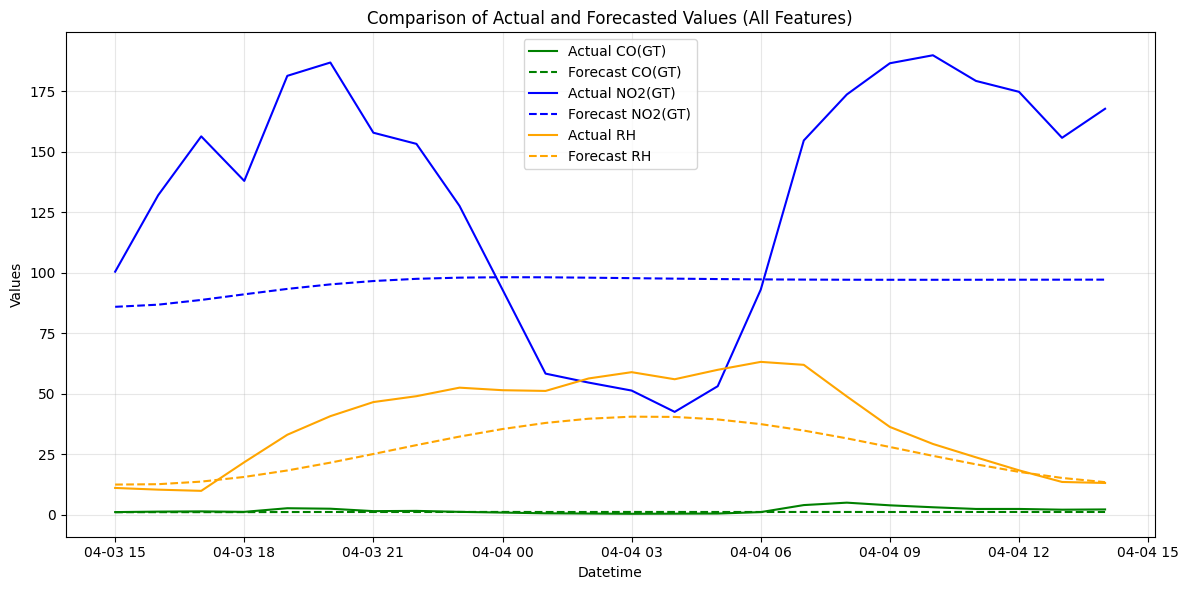

In [ ]:
from scipy.special import inv_boxcox
import matplotlib.pyplot as plt

# Fit ARIMA models for each series
model_co = ARIMA(train['CO(GT_boxcox)'], order=best_orders['CO(GT_boxcox)']).fit()
model_no2 = ARIMA(train['NO2(GT_boxcox)'], order=best_orders['NO2(GT_boxcox)']).fit()
model_rh = ARIMA(train['RH'], order=best_orders['RH']).fit()
forecast_steps = len(test)
forecast_co = model_co.forecast(steps=forecast_steps)
forecast_no2 = model_no2.forecast(steps=forecast_steps)
forecast_rh = model_rh.forecast(steps=forecast_steps)

df_forecast = pd.DataFrame({
    'CO(GT_boxcox)_forecast': forecast_co,
    'NO2(GT_boxcox)_forecast': forecast_no2,
    'RH_forecast': forecast_rh
}, index=test.index)

lambda_co = lambda_values['CO(GT)']
lambda_no2 = lambda_values['NO2(GT)']

df_forecast['CO(GT)_forecast'] = inv_boxcox(df_forecast['CO(GT_boxcox)_forecast'], lambda_co)
df_forecast['NO2(GT)_forecast'] = inv_boxcox(df_forecast['NO2(GT_boxcox)_forecast'], lambda_no2)

df_forecast['RH_forecast'] = df_forecast['RH_forecast']

features = ['CO(GT)', 'NO2(GT)', 'RH']
forecast_features = [f"{col}_forecast" for col in features]
df_comparison = pd.concat([df_original.loc[test.index], df_forecast[forecast_features]], axis=1)

print("Comparison of Actual and Forecasted Values:")
print(df_comparison)

plt.figure(figsize=(12, 6))
colors = {'CO(GT)': 'green', 'NO2(GT)': 'blue', 'RH': 'orange'}

for feature, color in colors.items():
    # Plot actual values
    plt.plot(
        df_original.loc[test.index].index,
        df_original.loc[test.index][feature],
        label=f"Actual {feature}",
        color=color,
        linestyle='-'
    )
    # Plot forecasted values
    plt.plot(
        df_forecast.index,
        df_forecast[f"{feature}_forecast"],
        label=f"Forecast {feature}",
        color=color,
        linestyle='--'
    )

plt.title("Comparison of Actual and Forecasted Values (All Features)")
plt.xlabel("Datetime")
plt.ylabel("Values")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## **CO(GT) Results:**

In [ ]:
model_co.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          CO(GT_boxcox)   No. Observations:                 9333
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -3424.259
Date:                Mon, 09 Dec 2024   AIC                           6870.519
Time:                        16:53:30   BIC                           6949.072
Sample:                    03-10-2004   HQIC                          6897.200
                         - 04-03-2005                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6922      0.148      4.682      0.000       0.402       0.982
ar.L2         -0.5468      0.157     -3.480      0.001      -0.855      -0.239
ar.L3          0.3984      0.173      2.303      0.021       0.059       0.737
ar.L4          0.2643      0.155      1.709      0.087      -0.039       0.567
ar.L5         -0.2613      0.049     -5.298      0.000      -0.358      -0.165
ma.L1         -0.4747      0.148     -3.203      0.001      -0.765      -0.184
ma.L2          0.2693      0.124      2.166      0.030       0.026       0.513
ma.L3         -0.4142      0.119     -3.469      0.001      -0.648      -0.180
ma.L4         -0.4960      0.132     -3.763      0.000      -0.754      -0.238
ma.L5          0.1490      0.030      5.018      0.000       0.091       0.207
sigma2         0.1212      0.001     93.506      0.000       0.119       0.124
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):              2273.54
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                             0.26
Prob(H) (two-sided):                  0.14   Kurtosis:                         5.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## **NO(GT) Results:**

In [ ]:
model_no2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         NO2(GT_boxcox)   No. Observations:                 9333
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -16835.192
Date:                Mon, 09 Dec 2024   AIC                          33680.384
Time:                        16:53:30   BIC                          33716.090
Sample:                    03-10-2004   HQIC                         33692.512
                         - 04-03-2005                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4477      0.018     80.386      0.000       1.412       1.483
ar.L2         -0.5884      0.016    -36.419      0.000      -0.620      -0.557
ma.L1         -1.2706      0.021    -61.012      0.000      -1.311      -1.230
ma.L2          0.2896      0.021     13.935      0.000       0.249       0.330
sigma2         2.1598      0.022     97.081      0.000       2.116       2.203
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2010.21
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                             0.02
Prob(H) (two-sided):                  0.03   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## **RH(GT) Results:**

In [ ]:
model_rh.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     RH   No. Observations:                 9333
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -25815.726
Date:                Mon, 09 Dec 2024   AIC                          51643.452
Time:                        16:53:30   BIC                          51686.300
Sample:                    03-10-2004   HQIC                         51658.006
                         - 04-03-2005                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.1489      0.006    343.545      0.000       2.137       2.161
ar.L2         -1.4195      0.012   -117.990      0.000      -1.443      -1.396
ar.L3          0.2174      0.006     34.996      0.000       0.205       0.230
ma.L1         -1.9264      0.001  -1370.469      0.000      -1.929      -1.924
ma.L2          0.9930      0.001    717.894      0.000       0.990       0.996
sigma2        14.6563      0.097    151.742      0.000      14.467      14.846
===================================================================================
Ljung-Box (L1) (Q):                   2.35   Jarque-Bera (JB):             27413.18
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### **2. Evaluated the model’s performance**

In [ ]:
metrics = {}

for feature in features:
    actual = df_original.loc[test.index][feature].values
    forecast = df_forecast[f"{feature}_forecast"].values

    mae = mean_absolute_error(actual, forecast)
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100
    me = np.mean(actual - forecast)
    mpe = np.mean((actual - forecast) / actual) * 100
    correlation, _ = pearsonr(actual, forecast)
    min_max_error = np.max(np.abs(actual - forecast)) / (np.max(actual) - np.min(actual))

    metrics[feature] = {
        "MAE": mae,
        "RMSE": rmse,
        "MAPE (%)": mape,
        "ME": me,
        "MPE (%)": mpe,
        "Correlation": correlation,
        "Min-Max Error": min_max_error
    }

import pandas as pd
metrics_df = pd.DataFrame(metrics).T
print("Metrics for ARIMA Forecast:")
print(metrics_df)



Metrics for ARIMA Forecast:
               MAE       RMSE   MAPE (%)         ME    MPE (%)  Correlation  \
CO(GT)    0.999621   1.390313  59.728865   0.696982  -1.370748     0.201571   
NO2(GT)  55.987564  61.402643  47.124162  36.139610   8.708976    -0.118428   
RH       12.440249  15.044428  28.684754  11.651427  21.367102     0.947521   

         Min-Max Error  
CO(GT)        0.835018  
NO2(GT)       0.629606  
RH            0.509479  


## **3. Comparison of Results: Use similar evaluation metrics to compare ARIMA and VAR predictions.**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Comparison of VAR and ARIMA Evaluation Metrics:
                  VAR_MAE   VAR_RMSE   VAR_MAPE  ARIMA_MAE  ARIMA_RMSE  \
CO(GT_boxcox)    0.523215   0.714784  72.938452   0.701110    0.859379   
NO2(GT_boxcox)   3.385772   3.780016  18.202962   4.594427    4.940895   
RH              10.457218  11.746007  33.894668  12.440249   15.044428   

                ARIMA_MAPE  
CO(GT_boxcox)    91.799794  
NO2(GT_boxcox)   25.518776  
RH               28.684754  


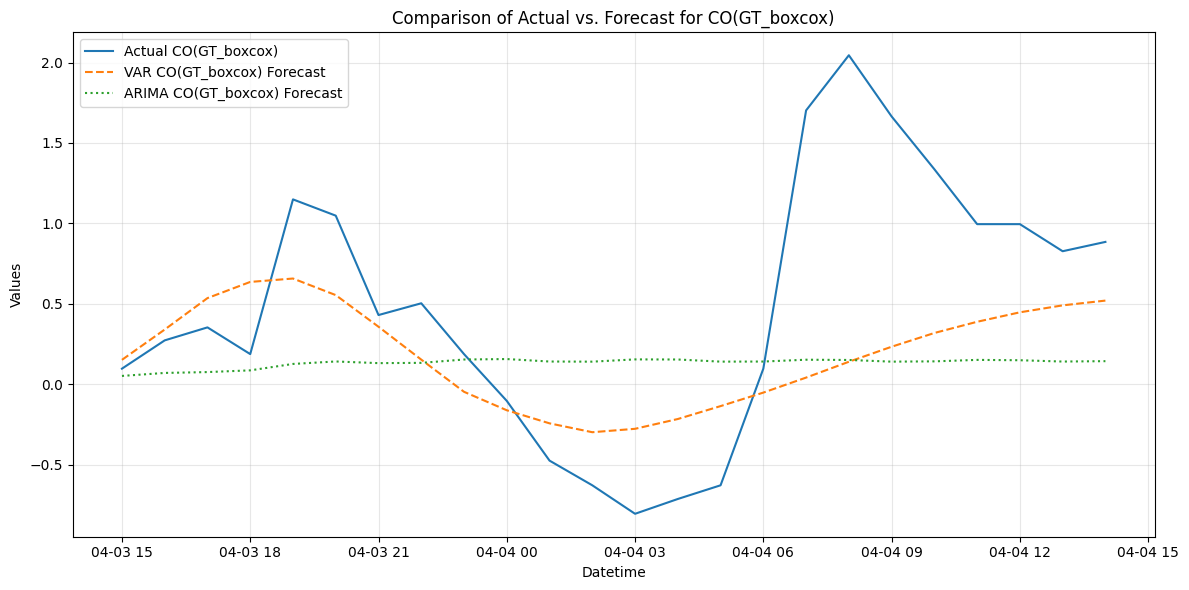

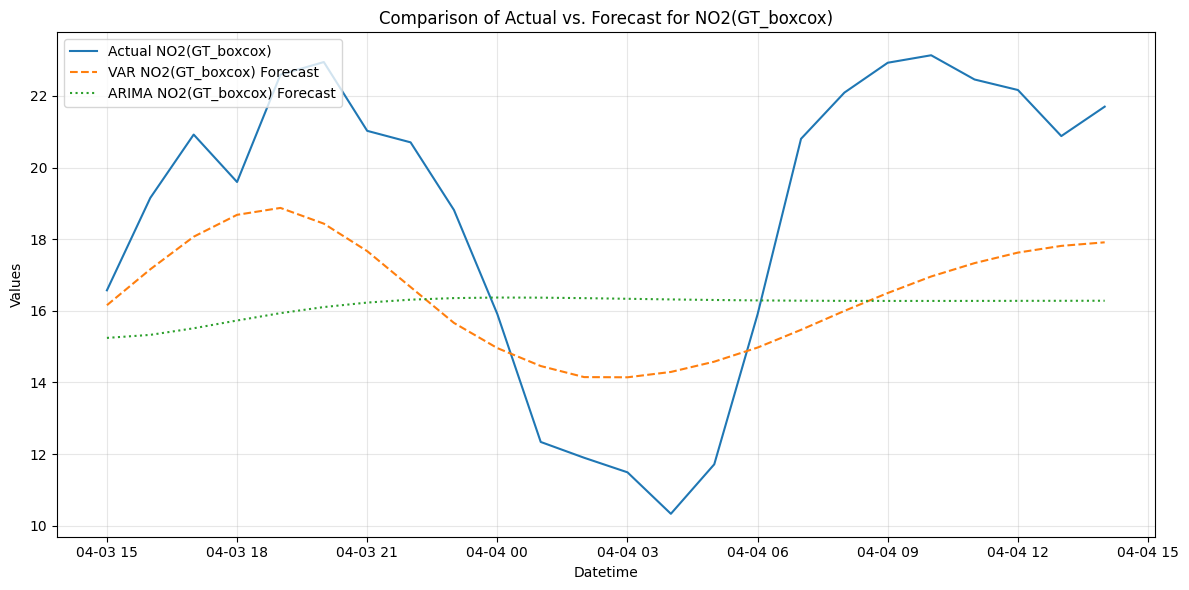

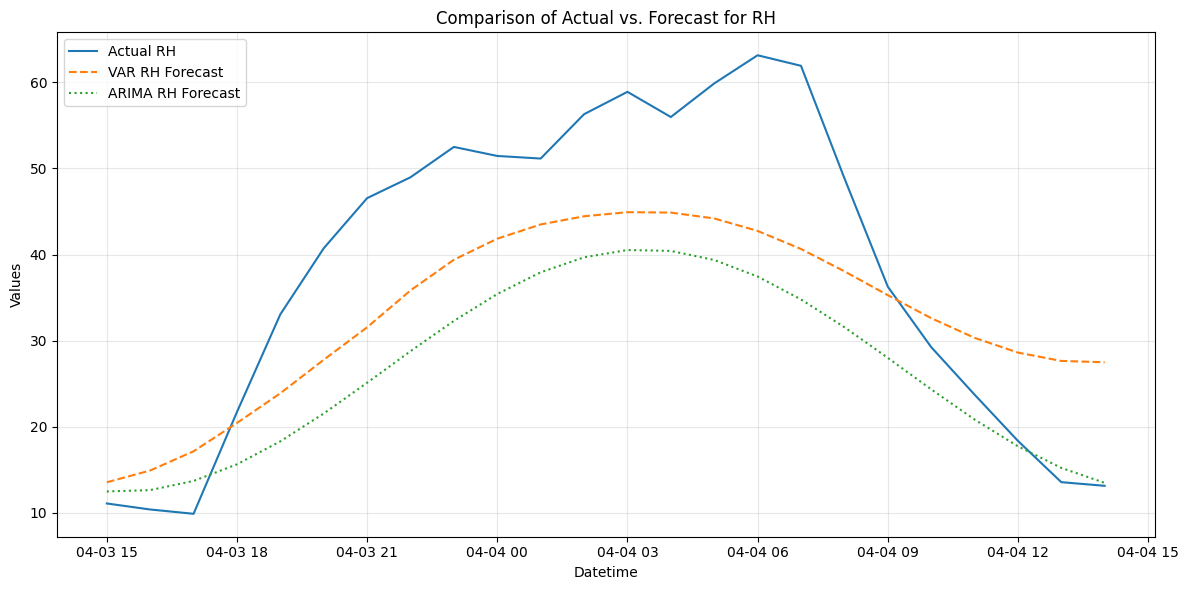

In [ ]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

var_model = VAR(train)
var_results = var_model.fit(maxlags=15, ic='aic')
var_forecast = var_results.forecast(y=train.values[-var_results.k_ar:], steps=len(test))
df_var_forecast = pd.DataFrame(var_forecast, index=test.index, columns=test.columns)

arima_forecasts = {}
for column in train.columns:
    arima_model = ARIMA(train[column], order=best_orders[column])
    arima_results = arima_model.fit()
    arima_forecasts[column] = arima_results.forecast(steps=len(test))

df_arima_forecast = pd.DataFrame(arima_forecasts, index=test.index)

metrics_comparison = {}
for column in test.columns:
    actual = test[column]
    var_pred = df_var_forecast[column]
    arima_pred = df_arima_forecast[column]

    mae_var = mean_absolute_error(actual, var_pred)
    rmse_var = np.sqrt(mean_squared_error(actual, var_pred))
    mape_var = np.mean(np.abs((actual - var_pred) / (actual + 1e-9))) * 100

    mae_arima = mean_absolute_error(actual, arima_pred)
    rmse_arima = np.sqrt(mean_squared_error(actual, arima_pred))
    mape_arima = np.mean(np.abs((actual - arima_pred) / (actual + 1e-9))) * 100

    metrics_comparison[column] = {
        "VAR_MAE": mae_var,
        "VAR_RMSE": rmse_var,
        "VAR_MAPE": mape_var,
        "ARIMA_MAE": mae_arima,
        "ARIMA_RMSE": rmse_arima,
        "ARIMA_MAPE": mape_arima,
    }

metrics_comparison_df = pd.DataFrame(metrics_comparison).T

print("\nComparison of VAR and ARIMA Evaluation Metrics:")
print(metrics_comparison_df)

import matplotlib.pyplot as plt

for column in test.columns:
    plt.figure(figsize=(12, 6))  #
    plt.plot(test.index, test[column], label=f"Actual {column}", linestyle='-')
    plt.plot(df_var_forecast.index, df_var_forecast[column], label=f"VAR {column} Forecast", linestyle='--')
    plt.plot(df_arima_forecast.index, df_arima_forecast[column], label=f"ARIMA {column} Forecast", linestyle=':')

    plt.title(f"Comparison of Actual vs. Forecast for {column}")
    plt.xlabel("Datetime")
    plt.ylabel("Values")
    plt.legend(loc="upper left")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()